# Bibliotecas

In [47]:
import pandas as pd
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from joblib import dump, load

# Carregamento dos dados


In [22]:
base_path = "/content"

df_orders     = pd.read_csv(f"{base_path}/orders.csv",     encoding="latin1")
df_deliveries = pd.read_csv(f"{base_path}/deliveries.csv", encoding="latin1")
df_stores     = pd.read_csv(f"{base_path}/stores.csv",     encoding="latin1")
df_hubs       = pd.read_csv(f"{base_path}/hubs.csv",       encoding="latin1")
df_channels   = pd.read_csv(f"{base_path}/channels.csv",   encoding="latin1")
df_payments   = pd.read_csv(f"{base_path}/payments.csv",   encoding="latin1")
df_drivers    = pd.read_csv(f"{base_path}/drivers.csv",    encoding="latin1")

print("orders:", df_orders.shape)
print("deliveries:", df_deliveries.shape)
print("stores:", df_stores.shape)
print("hubs:", df_hubs.shape)
print("channels:", df_channels.shape)
print("payments:", df_payments.shape)
print("drivers:", df_drivers.shape)


orders: (368999, 29)
deliveries: (378843, 5)
stores: (951, 7)
hubs: (32, 6)
channels: (40, 3)
payments: (400834, 6)
drivers: (4824, 3)


# Exploração dos dados

In [25]:
display(df_orders.head(5))
display(df_deliveries.head(5))
display(df_stores.head(5))
display(df_hubs.head(5))
display(df_channels.head(5))
display(df_payments.head(5))
display(df_drivers.head(5))

,order_id,store_id,channel_id,payment_order_id,delivery_order_id,order_status,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,...,order_moment_delivering,order_moment_delivered,order_moment_finished,order_metric_collected_time,order_metric_paused_time,order_metric_production_time,order_metric_walking_time,order_metric_expediton_speed_time,order_metric_transit_time,order_metric_cycle_time
0,68405119,3512,5,68405119,68405119,CANCELED,62.7,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68405123,3512,5,68405123,68405123,CANCELED,62.7,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,68405206,3512,5,68405206,68405206,CANCELED,115.5,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,68405465,3401,5,68405465,68405465,CANCELED,55.9,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,68406064,3401,5,68406064,68406064,CANCELED,37.9,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,delivery_id,delivery_order_id,driver_id,delivery_distance_meters,delivery_status
0,2174658,68413340,8378.0,5199.0,DELIVERED
1,2174660,68414309,2473.0,410.0,DELIVERED
2,2174661,68416230,7615.0,3784.0,DELIVERED
3,2174663,68412721,8378.0,5714.0,DELIVERED
4,2174675,68414018,10463.0,3746.0,DELIVERED


,store_id,hub_id,store_name,store_segment,store_plan_price,store_latitude,store_longitude
0,3,2,CUMIURI,FOOD,0.0,NaN,NaN
1,6,3,PIMGUCIS DA VIVA,FOOD,0.0,-30.037415,-51.203520
2,8,3,RASMUR S,FOOD,0.0,-30.037415,-51.203520
3,53,8,PAPA SUCIS,FOOD,0.0,-22.921475,-43.234822
4,54,8,VUZPI PAZZIS,FOOD,0.0,-22.921475,-43.234822


,hub_id,hub_name,hub_city,hub_state,hub_latitude,hub_longitude
0,2,BLUE SHOPPING,PORTO ALEGRE,RS,-30.047415,-51.213510
1,3,GREEN SHOPPING,PORTO ALEGRE,RS,-30.037415,-51.203520
2,4,RED SHOPPING,PORTO ALEGRE,RS,-30.021948,-51.208382
3,5,FUNK SHOPPING,RIO DE JANEIRO,RJ,-23.000750,-43.318282
4,8,GOLDEN SHOPPING,RIO DE JANEIRO,RJ,-22.921475,-43.234774


,channel_id,channel_name,channel_type
0,1,OTHER PLACE,OWN CHANNEL
1,2,PHONE PLACE,OWN CHANNEL
2,3,WHATS PLACE,OWN CHANNEL
3,4,FACE PLACE,OWN CHANNEL
4,5,FOOD PLACE,MARKETPLACE


,payment_id,payment_order_id,payment_amount,payment_fee,payment_method,payment_status
0,4427917,68410055,118.44,0.00,VOUCHER,PAID
1,4427918,68410055,394.81,7.90,ONLINE,PAID
2,4427941,68412721,206.95,5.59,ONLINE,PAID
3,4427948,68413340,58.80,1.59,ONLINE,PAID
4,4427955,68414018,45.80,0.92,ONLINE,PAID


,driver_id,driver_modal,driver_type
0,133,MOTOBOY,LOGISTIC OPERATOR
1,138,MOTOBOY,FREELANCE
2,140,MOTOBOY,FREELANCE
3,143,BIKER,FREELANCE
4,148,MOTOBOY,FREELANCE


# Tratamento de dado

In [30]:
df_orders['order_status'] = df_orders['order_status'].str.upper().str.strip()
df_deliveries['delivery_status'] = df_deliveries['delivery_status'].str.upper().str.strip()

print("Valores únicos de order_status:")
print(df_orders['order_status'].unique())

print("\nValores únicos de delivery_status:")
print(df_deliveries['delivery_status'].unique())

Valores únicos de order_status:
['CANCELED' 'FINISHED']

Valores únicos de delivery_status:
['DELIVERED' 'CANCELLED' 'DELIVERING']


In [31]:
df_deliv_small = df_deliveries[['delivery_order_id',
                                'delivery_distance_meters',
                                'delivery_status']]

display(df_deliv_small.head(10))

,delivery_order_id,delivery_distance_meters,delivery_status
0,68413340,5199.0,DELIVERED
1,68414309,410.0,DELIVERED
2,68416230,3784.0,DELIVERED
3,68412721,5714.0,DELIVERED
4,68414018,3746.0,DELIVERED
5,68415103,3924.0,DELIVERED
6,68416643,2489.0,DELIVERED
7,68417783,2564.0,CANCELLED
8,68415457,340.0,DELIVERED
9,68414563,1081.0,DELIVERED


In [32]:
df_merged = df_orders.merge(
    df_deliv_small,
    left_on='order_id',
    right_on='delivery_order_id',
    how='left'
)

print("Shape após merge:", df_merged.shape)


display(df_merged[['order_id',
                   'order_status',
                   'delivery_status',
                   'delivery_distance_meters']].head(10))

Shape após merge: (389188, 32)


,order_id,order_status,delivery_status,delivery_distance_meters
0,68405119,CANCELED,NaN,NaN
1,68405123,CANCELED,NaN,NaN
2,68405206,CANCELED,NaN,NaN
3,68405465,CANCELED,NaN,NaN
4,68406064,CANCELED,NaN,NaN
5,68408108,CANCELED,NaN,NaN
6,68408109,CANCELED,NaN,NaN
7,68409030,CANCELED,CANCELLED,1723.0
8,68410055,FINISHED,DELIVERED,1035.0
9,68412121,CANCELED,NaN,NaN


In [33]:
colunas_datas = [
    'order_moment_created','order_moment_accepted','order_moment_ready',
    'order_moment_collected','order_moment_in_expedition',
    'order_moment_delivering','order_moment_delivered','order_moment_finished'
]

for col in colunas_datas:
    df_merged[col] = pd.to_datetime(df_merged[col], errors='coerce')


display(df_merged[colunas_datas].dtypes)

/tmp/ipython-input-3107160350.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_merged[col] = pd.to_datetime(df_merged[col], errors='coerce')
/tmp/ipython-input-3107160350.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_merged[col] = pd.to_datetime(df_merged[col], errors='coerce')
/tmp/ipython-input-3107160350.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_merged[col] = pd.to_datetime(df_merged[col], errors='coerce')
/tmp/ipython-input-3107160350.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `

,0
order_moment_created,datetime64[ns]
order_moment_accepted,datetime64[ns]
order_moment_ready,datetime64[ns]
order_moment_collected,datetime64[ns]
order_moment_in_expedition,datetime64[ns]
order_moment_delivering,datetime64[ns]
order_moment_delivered,datetime64[ns]
order_moment_finished,datetime64[ns]


In [34]:
duplicados = df_merged.duplicated().sum()
print(f"Total de linhas duplicadas antes: {duplicados}")

if duplicados > 0:
    df_merged = df_merged.drop_duplicates()
    print("Duplicados removidos.")
    print("Shape após remoção:", df_merged.shape)
else:
    print("Nenhuma linha duplicada encontrada.")

Total de linhas duplicadas antes: 19925
Duplicados removidos.
Shape após remoção: (369263, 32)


In [35]:
nulos = df_merged.isna().sum().sort_values(ascending=False)
display(nulos.head(20))

,0
order_moment_delivered,349653
order_metric_walking_time,74119
order_metric_paused_time,71492
order_moment_in_expedition,67480
order_metric_collected_time,51546
order_moment_collected,42936
order_metric_expediton_speed_time,34654
order_metric_transit_time,25926
order_moment_delivering,25371
order_metric_production_time,25140


In [36]:
colunas_numericas = df_merged.select_dtypes(include=['float64', 'int64']).columns

for col in colunas_numericas:
    mediana = df_merged[col].median()
    df_merged[col] = df_merged[col].fillna(mediana)

#o
print("Nulos numéricos após preenchimento:")
print(df_merged[colunas_numericas].isna().sum().sum())

Nulos numéricos após preenchimento:
0


In [37]:
def tratar_outliers(df, coluna):
    q01 = df[coluna].quantile(0.01)
    q99 = df[coluna].quantile(0.99)
    df[coluna] = df[coluna].clip(q01, q99)
    print(f"{coluna}: limites aplicados ({q01:.2f}, {q99:.2f})")

colunas_outliers = [
    'order_amount',
    'order_delivery_fee',
    'order_delivery_cost',
    'delivery_distance_meters'
]

for col in colunas_outliers:
    tratar_outliers(df_merged, col)

display(df_merged[colunas_outliers].describe())

order_amount: limites aplicados (13.50, 473.90)
order_delivery_fee: limites aplicados (0.00, 14.90)
order_delivery_cost: limites aplicados (0.00, 19.34)
delivery_distance_meters: limites aplicados (182.00, 18695.80)


,order_amount,order_delivery_fee,order_delivery_cost,delivery_distance_meters
count,369263.000000,369263.000000,369263.000000,369263.000000
mean,95.081084,6.129862,7.178442,2761.570397
std,79.436949,5.169237,3.099908,2804.614416
min,13.500000,0.000000,0.000000,182.000000
25%,39.900000,0.000000,5.220000,1193.000000
50%,71.600000,6.900000,7.190000,2042.000000
75%,122.000000,11.900000,8.690000,3380.000000
max,473.900000,14.900000,19.340000,18695.800000


# Criação do target

In [38]:
cond_cancelado = (
    (df_merged['order_status'] == 'CANCELED') |
    (df_merged['delivery_status'] == 'CANCELLED')
)

df_merged['target_cancelado'] = np.where(cond_cancelado, 1, 0)

display(df_merged[['order_id', 'order_status', 'delivery_status', 'target_cancelado']].head(10))

,order_id,order_status,delivery_status,target_cancelado
0,68405119,CANCELED,NaN,1
1,68405123,CANCELED,NaN,1
2,68405206,CANCELED,NaN,1
3,68405465,CANCELED,NaN,1
4,68406064,CANCELED,NaN,1
5,68408108,CANCELED,NaN,1
6,68408109,CANCELED,NaN,1
7,68409030,CANCELED,CANCELLED,1
8,68410055,FINISHED,DELIVERED,0
9,68412121,CANCELED,NaN,1


In [39]:
print("Contagem de cada classe:")
print(df_merged['target_cancelado'].value_counts())

print("\nProporção (%):")
print(df_merged['target_cancelado'].value_counts(normalize=True) * 100)

Contagem de cada classe:
target_cancelado
0    352091
1     17172
Name: count, dtype: int64

Proporção (%):
target_cancelado
0    95.349656
1     4.650344
Name: proportion, dtype: float64


In [40]:
df_merged['target_cancelado'].isna().sum()

np.int64(0)

# Seleção dos Targets e preparação para modelo


In [41]:
features = [
    'order_amount',
    'order_delivery_fee',
    'order_delivery_cost',
    'order_created_hour',
    'order_created_day',
    'order_created_month',
    'delivery_distance_meters'
]

df_model = df_merged[features + ['target_cancelado']].copy()

display(df_model.head(10))

df_model.shape

,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,order_created_day,order_created_month,delivery_distance_meters,target_cancelado
0,62.7,0.00,7.19,0,1,1,2042.0,1
1,62.7,0.00,7.19,0,1,1,2042.0,1
2,115.5,0.00,7.19,0,1,1,2042.0,1
3,55.9,0.00,7.19,0,1,1,2042.0,1
4,37.9,0.00,7.19,0,1,1,2042.0,1
5,80.0,9.90,7.19,0,1,1,2042.0,1
6,71.0,9.90,7.19,0,1,1,2042.0,1
7,214.8,0.01,0.00,1,1,1,1723.0,1
8,394.8,0.01,6.00,2,1,1,1035.0,0
9,25.5,9.90,7.19,13,1,1,2042.0,1


(369263, 8)

In [42]:
df_model.isna().sum()

,0
order_amount,0
order_delivery_fee,0
order_delivery_cost,0
order_created_hour,0
order_created_day,0
order_created_month,0
delivery_distance_meters,0
target_cancelado,0


In [43]:
df_model = df_model.dropna()

print("Shape depois de remover nulos:", df_model.shape)

Shape depois de remover nulos: (369263, 8)


In [44]:
X = df_model[features]
y = df_model['target_cancelado']

X.head()

,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,order_created_day,order_created_month,delivery_distance_meters
0,62.7,0.0,7.19,0,1,1,2042.0
1,62.7,0.0,7.19,0,1,1,2042.0
2,115.5,0.0,7.19,0,1,1,2042.0
3,55.9,0.0,7.19,0,1,1,2042.0
4,37.9,0.0,7.19,0,1,1,2042.0


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape

((295410, 7), (73853, 7))

# Treino e avaliação de modelo

In [48]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [49]:
y_pred = rf.predict(X_test)

In [50]:
print("Matriz de confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de classificação:")
print(classification_report(y_test, y_pred))

Matriz de confusão:
[[70091   328]
 [  476  2958]]

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     70419
           1       0.90      0.86      0.88      3434

    accuracy                           0.99     73853
   macro avg       0.95      0.93      0.94     73853
weighted avg       0.99      0.99      0.99     73853



# Salvar modelo



In [51]:
os.makedirs('models', exist_ok=True)

caminho_modelo = 'models/modelo_cancelamento_rf.pkl'

dump(rf, caminho_modelo)

print(f"Modelo salvo com sucesso em: {caminho_modelo}")

Modelo salvo com sucesso em: models/modelo_cancelamento_rf.pkl


In [52]:
modelo_carregado = load(caminho_modelo)

print("Modelo carregado com sucesso!")

Modelo carregado com sucesso!


In [53]:
novo_pedido = pd.DataFrame([{
    'order_amount': 85.0,
    'order_delivery_fee': 7.90,
    'order_delivery_cost': 5.00,
    'order_created_hour': 18,
    'order_created_day': 12,
    'order_created_month': 3,
    'delivery_distance_meters': 2500
}])

prob_cancel = modelo_carregado.predict_proba(novo_pedido)[0, 1]
classe_predita = modelo_carregado.predict(novo_pedido)[0]

print(f"Probabilidade de cancelamento: {prob_cancel:.2%}")
print(f"Classe prevista (1 = cancela, 0 = não cancela): {classe_predita}")

Probabilidade de cancelamento: 1.00%
Classe prevista (1 = cancela, 0 = não cancela): 0


In [54]:
importances = rf.feature_importances_
feature_names = X.columns

df_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

df_importances

,feature,importance
2,order_delivery_cost,0.618559
6,delivery_distance_meters,0.156803
0,order_amount,0.070715
4,order_created_day,0.045848
5,order_created_month,0.045743
1,order_delivery_fee,0.033530
3,order_created_hour,0.028801


<Axes: ylabel='feature'>

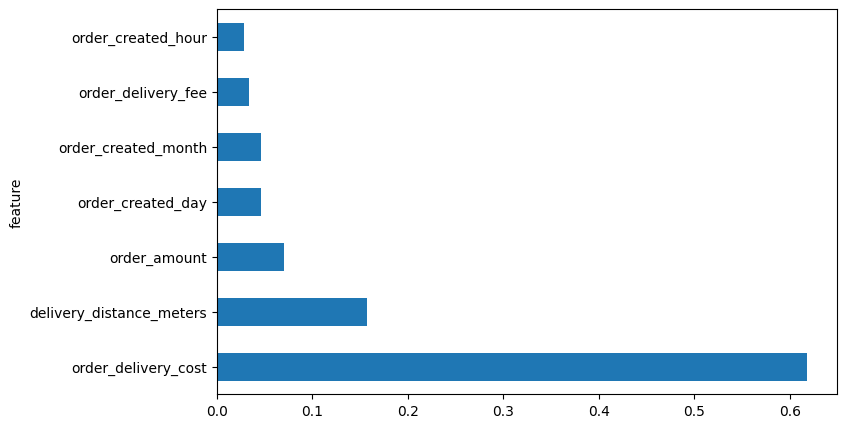

In [55]:
df_importances.plot.barh(
    x='feature', y='importance', figsize=(8,5), legend=False
)

In [56]:
for i, row in df_importances.iterrows():
    print(f"A feature '{row['feature']}' possui importância {row['importance']:.4f}")

A feature 'order_delivery_cost' possui importância 0.6186
A feature 'delivery_distance_meters' possui importância 0.1568
A feature 'order_amount' possui importância 0.0707
A feature 'order_created_day' possui importância 0.0458
A feature 'order_created_month' possui importância 0.0457
A feature 'order_delivery_fee' possui importância 0.0335
A feature 'order_created_hour' possui importância 0.0288


In [57]:
from google.colab import files
files.download('models/modelo_cancelamento_rf.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>